<a href="https://colab.research.google.com/github/quantum-intelligence/computational-physics/blob/main/CP_Lecture18b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computational Physics
###Lecture 18b
Neural Networks and Image Processing

In [ ]:
pip install mnist

In [118]:
import numpy as np
import mnist
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import os
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from keras import layers
import keras
import imageio
import time

In [ ]:
#You need to mount google drive to your Colab session.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Run the cells below for download_mnist() at the start of the lecture. Will take some time to load.

In [ ]:
# The first time you run this might be a bit slow, since the
# mnist package has to download and cache the data.
def download_mnist():
  train_images = mnist.train_images()
  train_labels = mnist.train_labels()
  test_images = mnist.test_images()
  test_labels = mnist.test_labels()
  return train_images, train_labels, test_images, test_labels


In [ ]:
download = False
mypath = "gdrive/MyDrive/Colab Notebooks/mnist.pkl"
if download:
  train_images, train_labels, test_images, test_labels = download_mnist()
  mnist_data = [train_images, train_labels, test_images, test_labels]
  with open(mypath, 'wb') as f:
    pickle.dump(mnist_data, f)
else:
  with open(mypath, 'rb') as f:
    mnist_data = pickle.load(f)
  x_train, y_train, x_test, y_test = mnist_data

In [ ]:
print(x_train.shape) # (60000, 28, 28)
print(y_train.shape) # (60000,)

(60000, 28, 28)
(60000,)


Display for first ten entries in train_images 

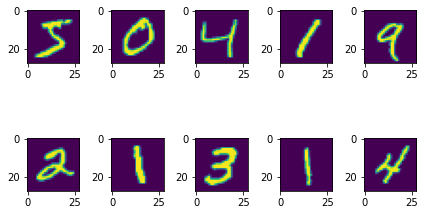

In [ ]:
for i in np.arange(10): 
  plt.subplot(2,5,i+1)
  plt.imshow(x_train[i])
plt.tight_layout()
plt.show()

## Process the image data:

In [ ]:
# Normalize the images.
x_train = (x_train / 255) #Note: do not unwrap x data
x_test = (x_test / 255) 

from tensorflow.keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Create a Convolutional Neural Network model:

In [88]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
inputdim = (28,28,1)
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=inputdim))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
output_dim = 10
model.add(Dense(output_dim, activation='softmax'))

In [89]:
# compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#labels are categorical variables
y_test[:4] 

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
#28 by 28pixels, one channel, 60000 training images,
x_train.shape 

(60000, 28, 28)


## Model fit:

In [ ]:
%%time
#train the model - you may need to use GPUs
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 165s 88ms/step - loss: 2.3015 - accuracy: 0.1118 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/3
1875/1875 [==============================] - 155s 83ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/3
1875/1875 [==============================] - 153s 82ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135


In [26]:
# predict first 4 images in the test set
np.around(model.predict(x_test[:4]),decimals=0)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [123]:
# actual results for first 4 images in test set
y_test[:4] 

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [188]:
# Categorical cross entropy - estimate of classification performance
y_true = y_test[:4] 
y_pred = model.predict(x_test[:4])
# Using 'auto'/'sum_over_batch_size' reduction type.
cce = tf.keras.losses.CategoricalCrossentropy()
print("Categorical cross entropy for the first 4 points: ", cce(y_true, y_pred).numpy())
#Categorical cross entropy is a kind of loss - lower values are better.

Categorical cross entropy for the first 4 points:  2.293941


In [73]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

conv2d (3, 3, 1, 64)
conv2d_1 (3, 3, 64, 32)


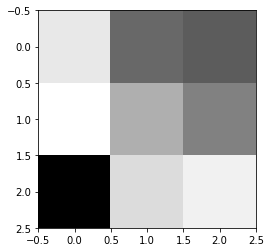

In [187]:
# display the first convolutional filter 
filters1, biases1 = model.layers[0].get_weights()
filters1.shape
f1 = filters1[:,:,:,0]
plt.imshow(f1[:,:,0])
plt.show()

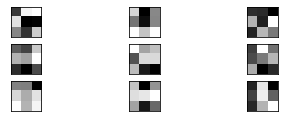

In [87]:
# plot first few filters
plt.figure(figsize=(6,6))
n_filters, ix = 9, 1
for i in range(n_filters):
  f = filters[:, :, :, i]
  ax = plt.subplot(n_filters, 3,ix)
  ax.set_xticks([])
  ax.set_yticks([])
  #plot filter channel in grayscale
  plt.imshow(f[:, :, 0], cmap='gray')
  ix += 1
plt.show()


### Plot the loss curve

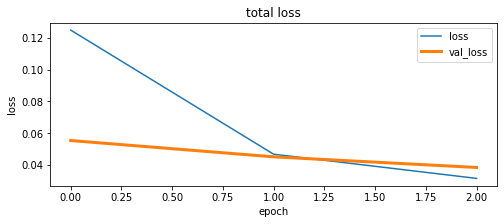

In [93]:
f, ax = plt.subplots(1, 1)
f.set_figwidth(8)
f.set_figheight(3)
ax.plot(history.history['loss'], label='loss')
ax.plot(history.history['val_loss'], label='val_loss', linewidth=3)
ax.set_title('total loss')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(loc='best')
plt.show()

 # COVID-19_Radiography_Dataset
 Adapt the Convolutional neural network designed for MNIST to analyze X-ray images

- Download the "COVID-19_Radiography_Dataset"
- https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database
- Process data
- Create X and y data
- Create training, vaidation and test sets
- Can you predict whether the X-ray images indicate a healthy or a sick patient?

In [115]:
# download the data and save it to your google drive:
datapath = "gdrive/MyDrive/Colab Notebooks/COVID-19_Radiography_Dataset/"

In [116]:
#check the subdirectories
os.listdir(datapath)

['COVID.metadata.xlsx',
 'Lung_Opacity.metadata.xlsx',
 'Normal.metadata.xlsx',
 'README.md.txt',
 'Viral Pneumonia.metadata.xlsx',
 '.DS_Store',
 'Viral Pneumonia',
 'Normal',
 'COVID',
 'Lung_Opacity']

In [163]:
# define paths to covid, normal and viral pneumonia x-ray images
covidpath = os.path.join(datapath, 'COVID/images')
normalpath = os.path.join(datapath, 'Normal/images')
pneumoniapath = os.path.join(datapath, 'Viral Pneumonia/images')

In [166]:
#check contents of a folder containing images
os.listdir(covidpath)[:4]

['COVID-1834.png', 'COVID-1808.png', 'COVID-747.png', 'COVID-753.png']

In [189]:
# Define a function to transform images from the png files into numpy arrays

def get_images(datapath, N=10):
  """
    pull images from folder 
    datapath: path to folder with x-ray images
    N: number of images, set to 10 for debugging
    return numpy array of images data
  """
  sizex = 299; sizey = 299 #sizes of images
  normal_pngs = os.listdir(datapath)
  Normal_Data = np.zeros((N,sizex,sizey))
  for ith, images in enumerate(normal_pngs[:N]):
    path = os.path.join(datapath,images)
    im = imageio.imread(path)
    if len(im.shape) == 2:
      Normal_Data[ith,:,:] = im
    else:
      Normal_Data[ith,:,:] = im[:,:,1]
  return Normal_Data



In [190]:
# get Normal x-ray images
Normal_Data = get_images(normalpath)
Covid_Data = get_images(covidpath)
Pneumonia_Data = get_images(pneumoniapath)

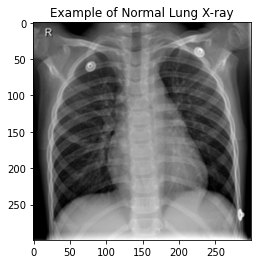

In [191]:
plt.imshow(Normal_Data[0,:,:])
plt.title("Example of Normal Lung X-ray")
plt.show()

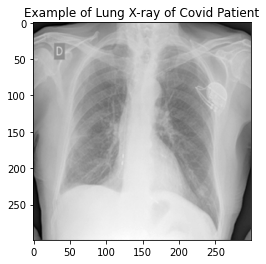

In [182]:
plt.imshow(Covid_Data[0,:,:])
plt.title("Example of Lung X-ray of Covid Patient")
plt.show()

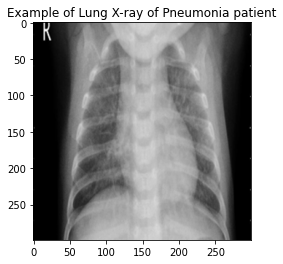

In [183]:
plt.imshow(Pneumonia_Data[0,:,:])
plt.title("Example of Lung X-ray of Pneumonia patient")
plt.show()

# QUESTIONS:
### Data exploration and planning:
- Visualize a few examples of data in each class
- What are the total number of available images in each class
- Why might we not want to use all of the images when writing and debugging the code?
- What is a potential pitfall of working with these images in comparison with the MNIST dataset?

### Data processing:
- Create a data set of x-ray images of three different classes alongside the appropriate labels.
- Divide the dataset into training, validation and test sets

### Model building:
- Modify the ConvNet shown above for the X-ray images dataset and three class classification
- Experiment with model fitting parameters: number of epochs, number of convolutional filters, etc.
- Experiment with the architecture then check the results. Is there improvement?

### Assess model performance:
- Consider difference classification model performance metrics.